In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
print(data.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

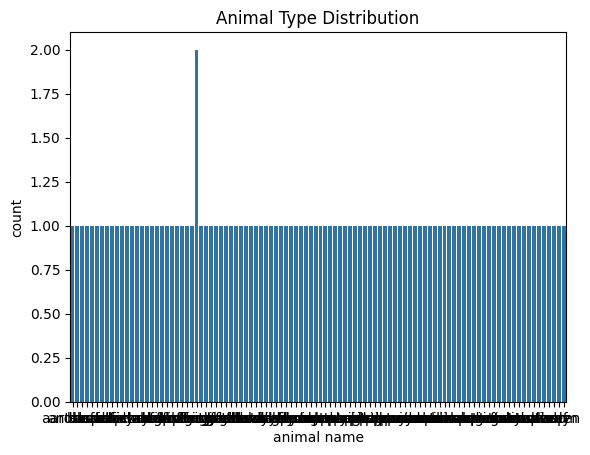

In [5]:
data = pd.read_csv('Zoo.csv')

print(data.head())

print(data.info())
print(data.describe())

print("Missing Values:\n", data.isnull().sum())

sns.countplot(x='animal name', data=data)
plt.title("Animal Type Distribution")
plt.show()

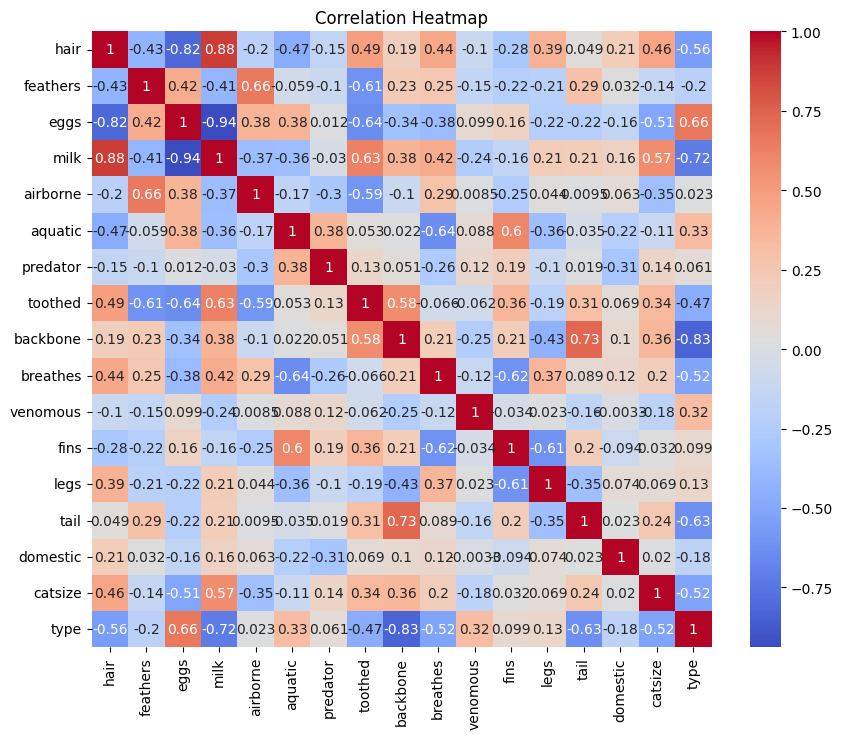

In [8]:
numerical_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(exclude=np.number).columns:
  data[col].fillna('Unknown', inplace=True)

<ipython-input-11-4911824194f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [13]:
X = data.drop('animal name', axis=1)
y = data['animal name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Default k=5, distance=euclidean

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Classification Report:
               precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00       1.0
    antelope       0.00      0.00      0.00       0.0
        bass       0.00      0.00      0.00       0.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       1.0
        calf       0.00      0.00      0.00       0.0
     catfish       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       1.0
        chub       0.00      0.00      0.00       1.0
        clam       0.00      0.00      0.00       0.0
        crow       0.00      0.00      0.00       0.0
     dogfish       0.00      0.00      0.00       1.0
     dolphin       0.00      0.00      0.00       0.0
    elephant       0.00      0.00      0.00       1.0
        flea       0.00      0.00      0.00       0.0
        frog       0.00      0.00      0.00       0.0
  

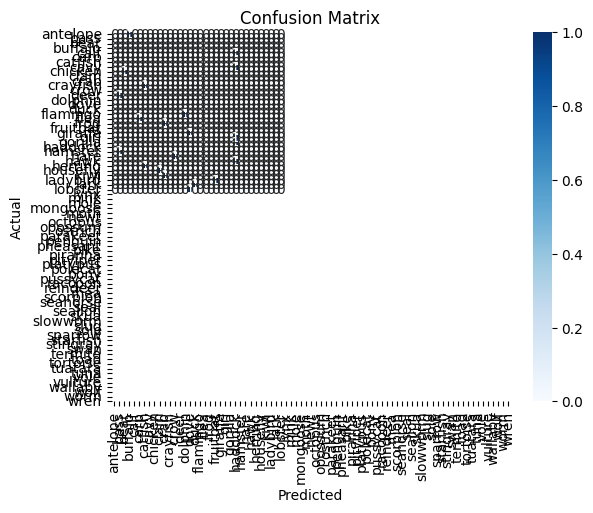

In [15]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

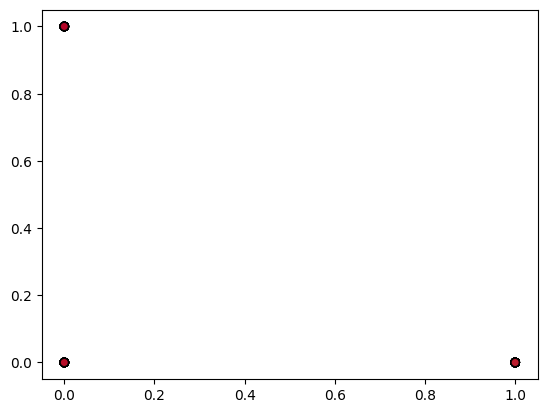

In [19]:
X_np = X.values

scatter = plt.scatter(X_np[:, 0], X_np[:, 1], c=y_encoded, edgecolor='k', cmap=plt.cm.coolwarm)